In [1]:
# checking downloaded agora 2 files

# new accuracy & precision plots; 
# collect all data so that no other loading of data would be needed. 
import collections

import compress_pickle
import copy
import editdistance
import itertools
import libsbml
import numpy as np
import operator
import os
import pickle
import pandas as pd
import sys
import time
import matplotlib.pyplot as plt
%matplotlib inline  

BIOMD_12 = 'BIOMD0000000012.xml'
BASE_DIR = '/Users/woosubshin/Desktop/AutomateAnnotation/'
DATA_DIR = os.path.join(BASE_DIR, "DATA")
ALGO_DIR = os.path.join(DATA_DIR, "algo")
CHEBI_DIR = os.path.join(DATA_DIR, "chebi")
FIGURE_DIR = '/Users/woosubshin/Desktop/AutomateAnnotation/AMAS_suppl/figure_files'
RHEA_DIR = os.path.join(DATA_DIR, "rhea")
BIOMODEL_DIR = os.path.join(DATA_DIR, "biomodels/curated_biomodels_31mar2021")
BIGG_DIR = '/Users/woosubshin/Desktop/AutomateAnnotation/DATA/bigg'
ecoli_fpath = os.path.join(BIGG_DIR, "e_coli_core.xml")

PROJ_DIR = os.path.join(os.getcwd(), os.pardir)
AMAS_DIR = os.path.join(PROJ_DIR, "AMAS")
sys.path.append(PROJ_DIR)

SUPPL_DIR = os.path.join(PROJ_DIR, os.pardir, "AMAS_suppl")
ACCURACY_DIR = os.path.join(SUPPL_DIR, "data_for_credibility")

# address changed - as of May 12, 2023. 
MANU_FIGURE_DIR = '/Users/woosubshin/Desktop/AutomateAnnotation/writeup/AMAS/Manu_figures_new'
SUPPL_FIGURE_DIR = '/Users/woosubshin/Desktop/AutomateAnnotation/writeup/AMAS/Supple_figures_new'

PRES_DIR = '/Users/woosubshin/Desktop/AutomateAnnotation/presentation/sauro_lab/sauro_lab_2023/jun82023'

from AMAS import species_annotation as sa
from AMAS import reaction_annotation as ra
from AMAS import recommender
from AMAS import constants as cn
from AMAS import iterator as it
from AMAS import tools

biggs = [val for val in os.listdir(BIGG_DIR) if val[-4:]=='.xml']
print("Number of BiGG models to be analyzed: %d" % len(biggs))

spec_ml_df = pd.read_csv(os.path.join(ACCURACY_DIR, 'biomd_individual_species_accuracy.csv'))
biomds_spec = np.unique(spec_ml_df['model'])
print("Number of BioModels to be analyzed for SPECIES: %d" % len(biomds_spec))

reac_ml_df = pd.read_csv(os.path.join(ACCURACY_DIR, 'biomd_individual_reactions_accuracy.csv'))
biomds_reac = np.unique(reac_ml_df['model'])
print("Number of BioModels to be analyzed for REACTIONS: %d" % len(biomds_reac))


SAVE_FPATH = '/Volumes/MGTEC/Agora2'

Number of BiGG models to be analyzed: 108
Number of BioModels to be analyzed for SPECIES: 306
Number of BioModels to be analyzed for REACTIONS: 131


In [2]:
agoras = [val for val in os.listdir(SAVE_FPATH) if val[-3:]=='xml']
print(len(agoras))

7302


In [3]:
print()
for one_a in agoras[:10]:
  print(one_a)
print("...\n")


Abiotrophia_defectiva_ATCC_49176.xml
Acaricomes_phytoseiuli_DSM_14247.xml
Acaryochloris_marina_MBIC11017.xml
Acetanaerobacterium_elongatum_CGMCC_1_5012.xml
Acetatifactor_muris_GP69.xml
Acetivibrio_cellulolyticus_CD2.xml
Acetivibrio_ethanolgignens_ACET_33324.xml
Acetobacterium_wieringae_DSM_1911.xml
Acetonema_longum_DSM_6540.xml
Achromobacter_insuavis_AXX_A.xml
...



In [232]:
genus_dict = dict()
species_dict = dict()
for one_a in agoras:
  one_a_list = one_a.split('_')
  one_genus = one_a_list[0]
  one_species = '_'.join(one_a_list[:2])
  if one_genus not in genus_dict.keys():
    genus_dict[one_genus] = [one_a]
  elif one_genus in genus_dict.keys():
    genus_dict[one_genus].append(one_a)

  if one_species not in species_dict.keys():
    species_dict[one_species] = [one_a]
  elif one_species in species_dict.keys():
    species_dict[one_species].append(one_a)

In [233]:
len(genus_dict)

448

In [253]:
print(len(species_dict['Escherichia_coli']))
species_dict['Escherichia_coli'][-2:]

987


['Escherichia_coli_XH140A.xml', 'Escherichia_coli_Xuzhou21.xml']

In [258]:
random.choice(species_dict['Escherichia_coli'])

'Escherichia_coli_KTE80.xml'

In [ ]:
random.sample(
models_not_working

In [263]:
[1, 2] in [1, 2, 3]

False

In [268]:
# finding two models in the same species that are loadable
# for k in species_dict.keys():
#   if len(species_dict[k])>100:
#     models = random.sample(species_dict[k], 2)
#     if all([val not in models_not_working \
#             for val in models]):
#       print("found!")
#       print(models)

ecoli1 = 'Helicobacter_pylori_Hp_P_2.xml'
ecoli2 = 'Helicobacter_pylori_8A3.xml'


recom1 = recommender.Recommender(libsbml_fpath=os.path.join(SAVE_FPATH, ecoli1))
recom2 = recommender.Recommender(libsbml_fpath=os.path.join(SAVE_FPATH, ecoli2))
# model1 = recom1.sbml_document.getModel()
# model2 = recom2.sbml_document.getModel()
ecol_specs1 = set(recom1.getSpeciesIDs())
ecol_specs2 = set(recom2.getSpeciesIDs())
ecol_reacs1 = set(recom1.getReactionIDs())
ecol_reacs2 = set(recom2.getReactionIDs())

In [284]:
len(species_dict['Helicobacter_pylori'])

232

In [273]:
print(len(ecol_specs1))
print(len(ecol_specs2))
print(len(ecol_specs1.intersection(ecol_specs2)))
print("...")
print(len(ecol_reacs1))
print(len(ecol_reacs2))
print(len(ecol_reacs1.intersection(ecol_reacs2)))

1326
1315
1265
...
1283
1261
1183


In [297]:
DOWN_DIR = '/Users/woosubshin/Downloads'
recom = recommender.Recommender(libsbml_fpath=os.path.join(DOWN_DIR, 'BMID000000141699_url.xml'))

In [298]:
len(recom.species.exist_annotation)

2118

In [303]:
model = recom.sbml_document.getModel()
one_s = model.getSpecies('bigg_fdp_i')
print(one_s.getAnnotationString())

<annotation>
  <rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:bqmodel="http://biomodels.net/model-qualifiers/" xmlns:bqbiol="http://biomodels.net/biology-qualifiers/">
    <rdf:Description rdf:about="#_22c2ee67_cb1b_4d29_ba7f_96668f50d656">
      <bqbiol:is>
        <rdf:Bag>
          <rdf:li rdf:resource="http://identifiers.org/chebi/CHEBI:28013"/>
          <rdf:li rdf:resource="http://identifiers.org/chebi/CHEBI:32966"/>
          <rdf:li rdf:resource="http://identifiers.org/chebi/CHEBI:32968"/>
          <rdf:li rdf:resource="http://identifiers.org/chebi/CHEBI:37736"/>
          <rdf:li rdf:resource="http://identifiers.org/chebi/CHEBI:40595"/>
          <rdf:li rdf:resource="http://identifiers.org/chebi/CHEBI:49299"/>
        </rdf:Bag>
      </bqbiol:is>
    </rdf:Description>
  </rdf:RDF>
</annotation>


In [343]:
one_m = 'Escherichia_coli_1_2264.xml'
one_fpath = os.path.join(DOWN_DIR, one_m)

reader = libsbml.SBMLReader()
sbml_document = reader.readSBML(one_fpath)
model = sbml_document.getModel()
print(model)

None


In [339]:
print(sbml_document.getNumErrors())

1


In [340]:
sbml_document.printErrors()

line 84180: (01006 [Error]) XML content is not well-formed.



In [7]:
total_chebis = []
total_rheas = []
total_specs = []
total_reacs = []

models_not_working = []

models = []
num_species = []
name_lengths = []
num_annotated_species = []
num_unique_chebis = []
num_reactions = []
num_components = []
num_annotated_reactions = []
num_unique_rheas = []


for idx, one_a in enumerate(agoras):
  if idx % 1000 == 0:
    print("We're at", idx)
  one_fpath = os.path.join(SAVE_FPATH, one_a)
  try: 
    recom = recommender.Recommender(libsbml_fpath=one_fpath)
  except:
    models_not_working.append(one_a)
    continue
  models.append(one_a)
  num_species.append(len(recom.species.names))
  name_lengths.append(np.mean([len(recom.species.names[k]) \
                               for k in recom.species.names.keys()]))
  num_annotated_species.append(len(recom.species.exist_annotation))
  unique_chebis = list(set(itertools.chain(*[recom.species.exist_annotation[k] \
                  for k in recom.species.exist_annotation.keys()])))
  num_reactions.append(len(recom.reactions.reaction_components))
  num_components.append(np.mean([len(recom.reactions.reaction_components[k]) \
                           for k in recom.reactions.reaction_components.keys()]))
  num_annotated_reactions.append(len(recom.reactions.exist_annotation))
  unique_rheas = list(set(itertools.chain(*[recom.reactions.exist_annotation[k] \
                 for k in recom.reactions.exist_annotation.keys()])))
  num_unique_chebis.append(len(unique_chebis))
  num_unique_rheas.append(len(unique_rheas))
  total_specs.append(list(recom.species.names.keys()))
  total_reacs.append(list(recom.reactions.reaction_components.keys()))
  total_chebis.append(unique_chebis)
  total_rheas.append(unique_rheas)

agora_summary = pd.DataFrame({'model': models,
                              'num_species': num_species,
                              'name_lengths': name_lengths,
                              'num_annotated_species': num_annotated_species,
                              'num_unique_chebis': num_unique_chebis,
                              'num_reactions': num_reactions, 
                              'num_components': num_components,
                              'num_annotated_reactions': num_annotated_reactions,
                              'num_unique_rheas': num_unique_rheas})
specs = list(set(itertools.chain(*total_specs)))
reacs = list(set(itertools.chain(*total_reacs)))
chebis = list(set(itertools.chain(*total_chebis)))
rheas = list(set(itertools.chain(*total_rheas)))

We're at 0
We're at 1000
We're at 2000
We're at 3000
We're at 4000
We're at 5000
We're at 6000
We're at 7000


(array([  34.,  298., 1726., 1334., 1096.,  565.,   95.,   66.,  249.,
          93.]),
 array([ 496. ,  683.9,  871.8, 1059.7, 1247.6, 1435.5, 1623.4, 1811.3,
        1999.2, 2187.1, 2375. ]),
 <BarContainer object of 10 artists>)

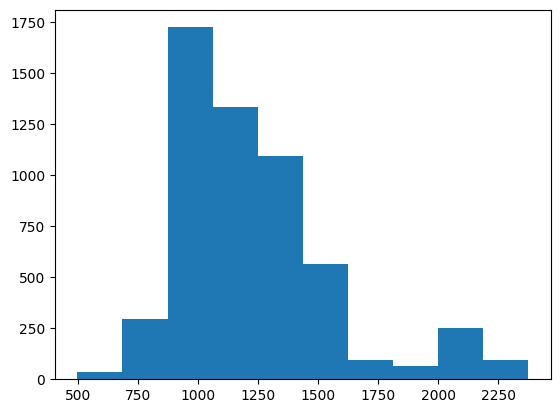

In [285]:
plt.hist(agora_summary['num_species'])

(array([  41.,  339., 1625., 1210., 1226.,  434.,  282.,   74.,  237.,
          88.]),
 array([ 507. ,  719.6,  932.2, 1144.8, 1357.4, 1570. , 1782.6, 1995.2,
        2207.8, 2420.4, 2633. ]),
 <BarContainer object of 10 artists>)

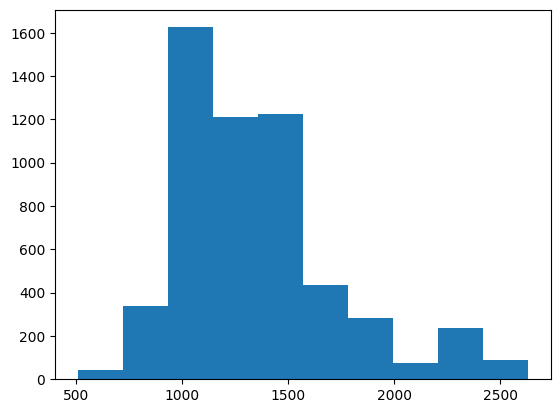

In [286]:
plt.hist(agora_summary['num_reactions'])

In [50]:
agora_total = {'specs': specs, 'reacs': reacs,
               'chebis':chebis, 'rheas': rheas}

with open(os.path.join(PRES_DIR, 'agora_total.pkl'), 'wb') as f:
    pickle.dump(agora_total, f)

In [52]:
with open(os.path.join(PRES_DIR, 'agora_total.pkl'), 'rb') as f:
    tots = pickle.load(f)

In [8]:
agora_summary.to_csv(os.path.join(PRES_DIR, 'agora_summary.csv'), index=False)

In [11]:
agora_summary.shape

(5556, 9)

In [15]:
models_issues = []
for idx, one_a in enumerate(models_not_working):
  if idx % 100 == 0:
    print("We're at", idx)
  one_fpath = os.path.join(SAVE_FPATH, one_a)
  try: 
    reader = libsbml.SBMLReader()
    sbml_document = reader.readSBML(one_fpath)
    model = sbml_document.getModel()
    _ = model.getNumSpecies()
    _ = model.getNumReactions()
  except:
    models_issues.append(one_a)
    continue

We're at 0
We're at 1000


In [20]:
print(len(models_not_working))
len(models_not_working) / 7302 * 100

1746


23.91125718981101

In [22]:
models_not_working[0]

'Acinetobacter_pittii_ANC_4050.xml'

In [21]:
agora_summary.shape

(5556, 9)

In [21]:
reader = libsbml.SBMLReader()
sbml_document = reader.readSBML(one_fpath)
model = sbml_document.getModel()

In [24]:
one_m = recom.sbml_document.getModel()

In [26]:
one_m.getListOfSpecies()[0].name

'10-Deoxymethymycin'

In [25]:
model = recom.sbml_document.getModel()

In [29]:
model.getListOfSpecies()[0]

<Species M_10fthf5glu__91__c__93__ "10-formyltetrahydrofolate-[Glu](5)">

In [31]:
agora_summary.head()

,model,num_species,name_lengths,num_annotated_species,num_unique_chebis,num_reactions,num_components,num_annotated_reactions,num_unique_rheas
0,Abiotrophia_defectiva_ATCC_49176.xml,965,26.443523,648,206,1048,4.350191,644,447
1,Acaricomes_phytoseiuli_DSM_14247.xml,952,25.844538,693,578,1064,4.343985,687,479
2,Acaryochloris_marina_MBIC11017.xml,1144,26.161713,816,627,1242,4.305958,753,526
3,Acetanaerobacterium_elongatum_CGMCC_1_5012.xml,878,26.288155,580,471,932,4.424893,576,404
4,Acetatifactor_muris_GP69.xml,961,27.337149,644,543,1014,4.357988,674,476


In [121]:
print(np.min(agora_summary['num_species']))
print(np.max(agora_summary['num_species']))
print(np.median(agora_summary['num_species']))

496
2375
1160.0


In [36]:
np.round(np.mean(agora_summary['num_species']), 1)
np.round(np.mean(agora_summary['num_annotated_species']), 1)

np.round(np.mean(agora_summary['num_reactions']), 1)
np.round(np.mean(agora_summary['num_annotated_reactions']), 1)

np.round(np.mean(agora_summary['num_annotated_species']/agora_summary['num_species'])*100,1)
np.round(np.mean(agora_summary['num_annotated_reactions']/agora_summary['num_reactions'])*100,1)

1228.7

In [48]:
# Now, get distributions

(array([  34.,  298., 1726., 1334., 1096.,  565.,   95.,   66.,  249.,
          93.]),
 array([ 496. ,  683.9,  871.8, 1059.7, 1247.6, 1435.5, 1623.4, 1811.3,
        1999.2, 2187.1, 2375. ]),
 <BarContainer object of 10 artists>)

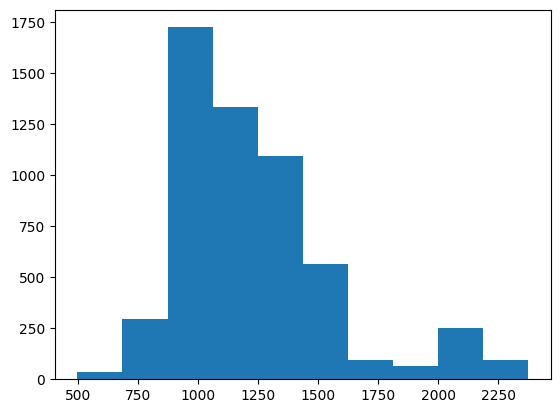

In [49]:
plt.hist(agora_summary['num_species'])

In [2]:
# summary of biomodels
biomds = [val for val in os.listdir(BIOMODEL_DIR) if val[-3:]=='xml']

total_chebis = []
total_rheas = []
total_specs = []
total_reacs = []

models = []
num_species = []
name_lengths = []
num_annotated_species = []
num_unique_chebis = []
num_reactions = []
num_components = []
num_annotated_reactions = []
num_unique_rheas = []


for idx, one_biomd in enumerate(biomds):
  if idx % 100 == 0:
    print("We're at", idx)
  one_fpath = os.path.join(BIOMODEL_DIR, one_biomd)
  recom = recommender.Recommender(libsbml_fpath=one_fpath)
  models.append(one_biomd)
  num_species.append(len(recom.species.names))
  name_lengths.append(np.mean([len(recom.species.names[k]) \
                               for k in recom.species.names.keys()]))
  num_annotated_species.append(len(recom.species.exist_annotation))
  unique_chebis = list(set(itertools.chain(*[recom.species.exist_annotation[k] \
                  for k in recom.species.exist_annotation.keys()])))
  num_reactions.append(len(recom.reactions.reaction_components))
  num_components.append(np.mean([len(recom.reactions.reaction_components[k]) \
                           for k in recom.reactions.reaction_components.keys()]))
  num_annotated_reactions.append(len(recom.reactions.exist_annotation))
  unique_rheas = list(set(itertools.chain(*[recom.reactions.exist_annotation[k] \
                 for k in recom.reactions.exist_annotation.keys()])))
  num_unique_chebis.append(len(unique_chebis))
  num_unique_rheas.append(len(unique_rheas))
  total_specs.append(list(recom.species.names.keys()))
  total_reacs.append(list(recom.reactions.reaction_components.keys()))
  total_chebis.append(unique_chebis)
  total_rheas.append(unique_rheas)

biomd_summary = pd.DataFrame({'model': models,
                              'num_species': num_species,
                              'name_lengths': name_lengths,
                              'num_annotated_species': num_annotated_species,
                              'num_unique_chebis': num_unique_chebis,
                              'num_reactions': num_reactions, 
                              'num_components': num_components,
                              'num_annotated_reactions': num_annotated_reactions,
                              'num_unique_rheas': num_unique_rheas})
specs = list(set(itertools.chain(*total_specs)))
reacs = list(set(itertools.chain(*total_reacs)))
chebis = list(set(itertools.chain(*total_chebis)))
rheas = list(set(itertools.chain(*total_rheas)))
biomd_total = {'specs': specs, 'reacs': reacs,
               'chebis':chebis, 'rheas': rheas}

We're at 0


/Users/woosubshin/miniconda3/envs/amas_dev/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/woosubshin/miniconda3/envs/amas_dev/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


We're at 100
We're at 200
We're at 300
We're at 400
We're at 500
We're at 600
We're at 700
We're at 800
We're at 900


In [4]:
model = recom.sbml_document.getModel()
model

<Model MODEL1602280001 "Thiaville2016 - Wild type folate pathway model with proposed PanB reaction">

In [12]:
one_r = model.getReaction(0)
one_k = one_r.getKineticLaw()
one_k.formula

'compartment * k1 * ATP * H2_HMPt'

<module 'AMAS.tools' from '/Users/woosubshin/Desktop/AutomateAnnotation/AMAS/notebooks/../AMAS/tools.py'>

'compartment * k1 * ATP * H2_HMPt'

In [63]:
biomd_summary.head()

,model,num_species,name_lengths,num_annotated_species,num_unique_chebis,num_reactions,num_components,num_annotated_reactions,num_unique_rheas
0,BIOMD0000000634.xml,69,0.000000,5,5,112,2.857143,0,0
1,BIOMD0000000152.xml,64,7.906250,5,3,120,2.958333,34,4
2,BIOMD0000000146.xml,36,0.000000,2,2,34,2.235294,0,0
3,BIOMD0000000620.xml,35,0.000000,1,1,20,1.000000,0,0
4,BIOMD0000000608.xml,52,3.826923,0,0,140,2.200000,0,0


In [118]:
print(np.round(np.mean(biomd_summary['num_species']), 1))
print(np.round(np.mean(biomd_summary['num_annotated_species']), 1))

print(np.round(np.mean(biomd_summary['num_reactions']), 1))
print(np.round(np.mean(biomd_summary['num_annotated_reactions']), 1))

print(np.round(np.mean(biomd_summary['num_annotated_species']/biomd_summary['num_species'])*100,1))
print(np.round(np.mean(biomd_summary['num_annotated_reactions']/biomd_summary['num_reactions'])*100,1))

23.3
5.5
30.1
2.2
19.8
6.2


In [64]:
# summary of biggs
biggs = [val for val in os.listdir(BIGG_DIR) if val[-3:]=='xml']

total_chebis = []
total_rheas = []
total_specs = []
total_reacs = []

models = []
num_species = []
name_lengths = []
num_annotated_species = []
num_unique_chebis = []
num_reactions = []
num_components = []
num_annotated_reactions = []
num_unique_rheas = []


for idx, one_bigg in enumerate(biggs):
  if idx % 10 == 0:
    print("We're at", idx)
  one_fpath = os.path.join(BIGG_DIR, one_bigg)
  recom = recommender.Recommender(libsbml_fpath=one_fpath)
  models.append(one_bigg)
  num_species.append(len(recom.species.names))
  name_lengths.append(np.mean([len(recom.species.names[k]) \
                               for k in recom.species.names.keys()]))
  num_annotated_species.append(len(recom.species.exist_annotation))
  unique_chebis = list(set(itertools.chain(*[recom.species.exist_annotation[k] \
                  for k in recom.species.exist_annotation.keys()])))
  num_reactions.append(len(recom.reactions.reaction_components))
  num_components.append(np.mean([len(recom.reactions.reaction_components[k]) \
                           for k in recom.reactions.reaction_components.keys()]))
  num_annotated_reactions.append(len(recom.reactions.exist_annotation))
  unique_rheas = list(set(itertools.chain(*[recom.reactions.exist_annotation[k] \
                 for k in recom.reactions.exist_annotation.keys()])))
  num_unique_chebis.append(len(unique_chebis))
  num_unique_rheas.append(len(unique_rheas))
  total_specs.append(list(recom.species.names.keys()))
  total_reacs.append(list(recom.reactions.reaction_components.keys()))
  total_chebis.append(unique_chebis)
  total_rheas.append(unique_rheas)

bigg_summary = pd.DataFrame({'model': models,
                              'num_species': num_species,
                              'name_lengths': name_lengths,
                              'num_annotated_species': num_annotated_species,
                              'num_unique_chebis': num_unique_chebis,
                              'num_reactions': num_reactions, 
                              'num_components': num_components,
                              'num_annotated_reactions': num_annotated_reactions,
                              'num_unique_rheas': num_unique_rheas})
specs = list(set(itertools.chain(*total_specs)))
reacs = list(set(itertools.chain(*total_reacs)))
chebis = list(set(itertools.chain(*total_chebis)))
rheas = list(set(itertools.chain(*total_rheas)))
bigg_total = {'specs': specs, 'reacs': reacs,
              'chebis':chebis, 'rheas': rheas}

We're at 0
We're at 10
We're at 20
We're at 30
We're at 40
We're at 50
We're at 60
We're at 70
We're at 80
We're at 90
We're at 100


In [120]:
print(np.round(np.mean(bigg_summary['num_species']), 1))
print(np.round(np.mean(bigg_summary['num_annotated_species']), 1))

print(np.round(np.mean(bigg_summary['num_reactions']), 1))
print(np.round(np.mean(bigg_summary['num_annotated_reactions']), 1))

print(np.round(np.mean(bigg_summary['num_annotated_species']/bigg_summary['num_species'])*100,1))
print(np.round(np.mean(bigg_summary['num_annotated_reactions']/bigg_summary['num_reactions'])*100,1))

1674.1
1245.5
2328.0
1119.9
76.9
51.4


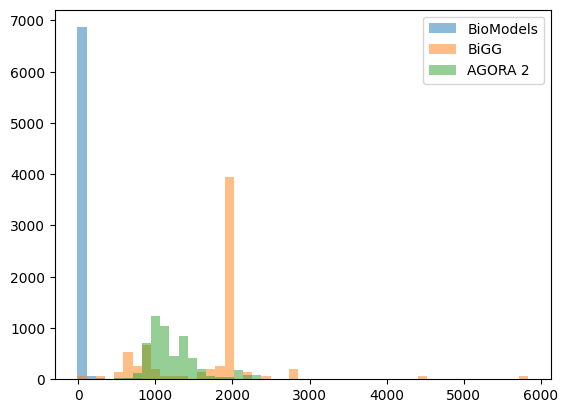

In [114]:
x=list(biomd_summary['num_species'])*7
y=list(bigg_summary['num_species'])*67
z=list(agora_summary['num_species'])

bins_max = np.max(list(x)+list(y)+list(z))

bins = np.linspace(-10, bins_max, 50)

plt.hist(x, bins, alpha=0.5, label='BioModels')
plt.hist(y, bins, alpha=0.5, label='BiGG')
plt.hist(z, bins, alpha=0.5, label='AGORA 2')
plt.legend(loc='upper right')
plt.savefig(os.path.join(PRES_DIR, 'compare_num_species.png'))
plt.show()

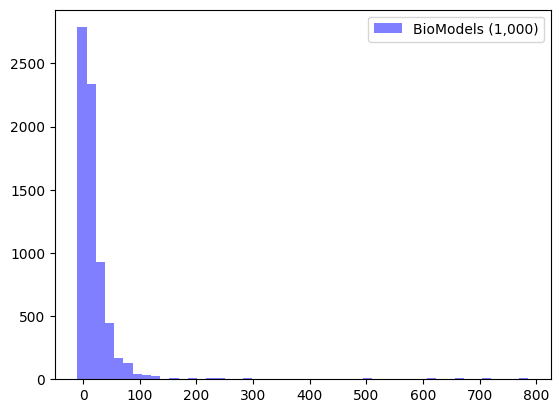

In [112]:
x=list(biomd_summary['num_species'])*7
bins = np.linspace(-10, np.max(x), 50)
plt.hist(x, bins, alpha=0.5, color='b', label='BioModels (1,000)')
plt.legend()

In [99]:
len(x)

5000

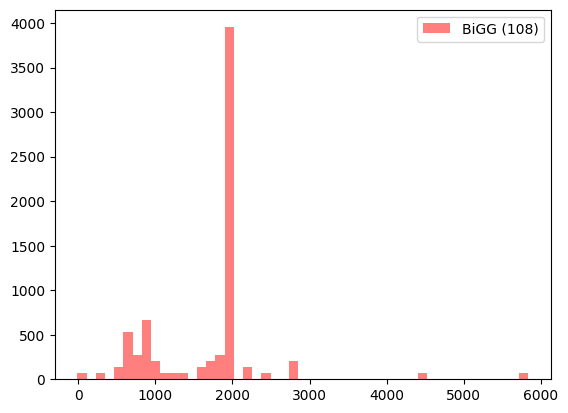

In [111]:
y=list(bigg_summary['num_species'])*67
bins = np.linspace(-10, np.max(y), 50)
plt.hist(y, bins, alpha=0.5, color='r', label='BiGG (108)')
plt.legend()

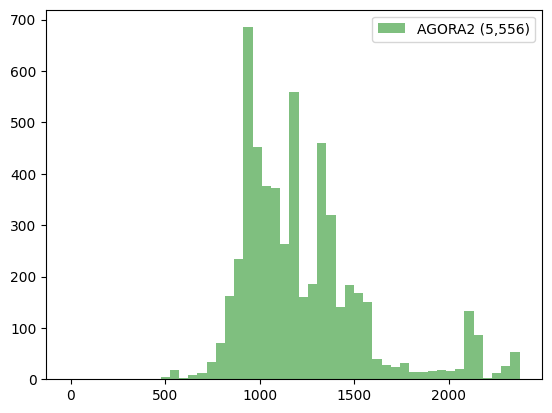

In [110]:
z=list(agora_summary['num_species'])
bins = np.linspace(-10, np.max(z), 50)
plt.hist(z, bins, alpha=0.5, color='g', label='AGORA2 (5,556)')
plt.legend()

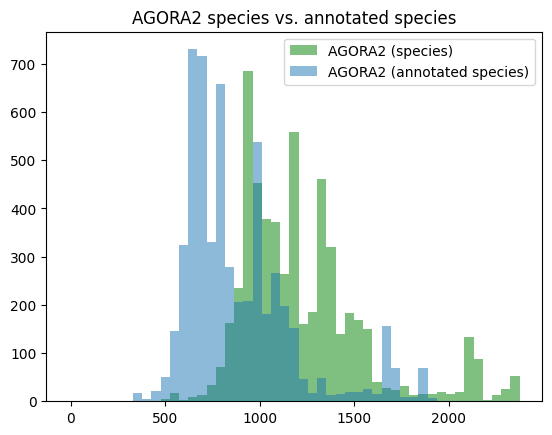

In [116]:
x=list(agora_summary['num_species'])
y=list(agora_summary['num_annotated_species'])

bins_max = np.max(list(x)+list(y))

bins = np.linspace(-10, bins_max, 50)

plt.hist(x, bins, alpha=0.5, color='g', label='AGORA2 (species)')
plt.hist(y, bins, alpha=0.5, label='AGORA2 (annotated species)')
plt.legend(loc='upper right')
plt.title('AGORA2 species vs. annotated species')
# plt.savefig(os.path.join(PRES_DIR, 'compare_num_species.png'))
plt.show()

507
2633
1284.0


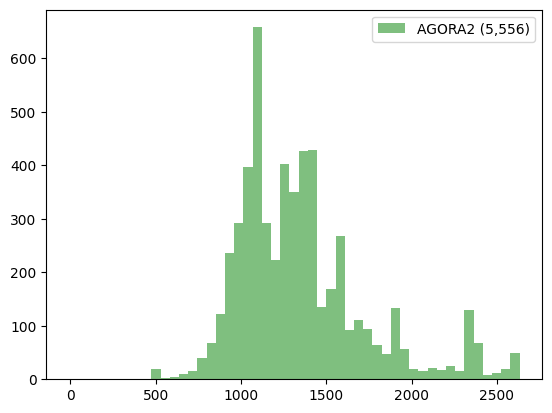

In [123]:
z=list(agora_summary['num_reactions'])
print(np.min(z))
print(np.max(z))
print(np.median(z))
bins = np.linspace(-10, np.max(z), 50)
plt.hist(z, bins, alpha=0.5, color='g', label='AGORA2 (5,556)')
plt.legend()

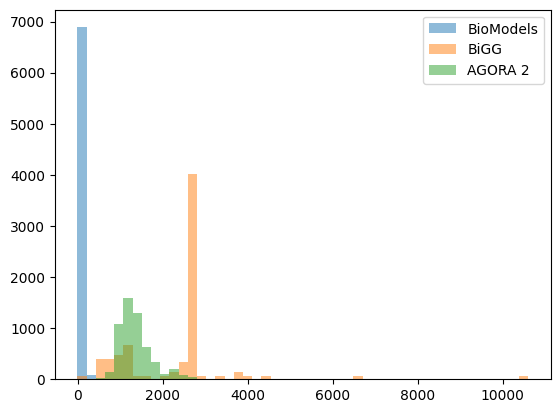

In [127]:
x=list(biomd_summary['num_reactions'])*7
y=list(bigg_summary['num_reactions'])*67
z=list(agora_summary['num_reactions'])

bins_max = np.max(list(x)+list(y)+list(z))

bins = np.linspace(-10, bins_max, 50)

plt.hist(x, bins, alpha=0.5, label='BioModels')
plt.hist(y, bins, alpha=0.5, label='BiGG')
plt.hist(z, bins, alpha=0.5, label='AGORA 2')
plt.legend(loc='upper right')
plt.savefig(os.path.join(PRES_DIR, 'compare_num_reactions.png'))
plt.show()

In [148]:
one_a = agoras[1000]
one_fpath = os.path.join(SAVE_FPATH, one_a)
recom = recommender.Recommender(libsbml_fpath=one_fpath)
model = recom.sbml_document.getModel()
print("Model %s\n\n" % one_a)
for one_s in model.getListOfSpecies()[20:30]:
  print("%s: %s" % (one_s.getId(), one_s.name))
print("...\n")

Model Bifidobacterium_breve_MCC_1604.xml


M_14m3hpalmACP__91__c__93__: 14-methyl-3-hydroxy-hexa-decanoyl-ACP
M_14m3hpentdecACP__91__c__93__: 14-methyl-3-hydroxy-pentadecanoyl-ACP
M_14m3opalmACP__91__c__93__: 14-methyl-3-oxo-hexa-decanoyl-ACP
M_14m3opentdecACP__91__c__93__: 14-methyl-3-oxo-pentadecanoyl-ACP
M_15m3hpalmACP__91__c__93__: 15-methyl-3-hydroxy-hexa-decanoyl-ACP
M_15m3opalmACP__91__c__93__: 15-methyl-3-oxo-hexa-decanoyl-ACP
M_1agpe120__91__c__93__: 1-Acyl-sn-glycero-3-phosphoethanolamine (n-C12:0)
M_1agpe140__91__c__93__: 1-Acyl-sn-glycero-3-phosphoethanolamine (n-C14:0)
M_1agpe141__91__c__93__: 1-Acyl-sn-glycero-3-phosphoethanolamine (n-C14:1)
M_1agpe160__91__c__93__: 1-Acyl-sn-glycero-3-phosphoethanolamine (n-C16:0)
...



In [150]:
one_a = biggs[0]
one_fpath = os.path.join(BIGG_DIR, one_a)
recom = recommender.Recommender(libsbml_fpath=one_fpath)
model = recom.sbml_document.getModel()
print("Model %s\n\n" % one_a)
for one_s in model.getListOfSpecies()[10:20]:
  print("%s: %s" % (one_s.getId(), one_s.name))
print("...\n")

Model iCHOv1.xml


M_10fthf7glu_l: 10-formyltetrahydrofolate-[Glu](7)
M_10fthf7glu_m: 10-formyltetrahydrofolate-[Glu](7)
M_3mob_c: 3-Methyl-2-oxobutanoate
M_3mob_e: 3-Methyl-2-oxobutanoate
M_10fthf_c: 10-Formyltetrahydrofolate
M_3mob_m: 3-Methyl-2-oxobutanoate
M_2kmb_c: 2-keto-4-methylthiobutyrate
M_3mop_c: (S)-3-Methyl-2-oxopentanoate
M_3mop_e: (S)-3-Methyl-2-oxopentanoate
M_10fthf_e: 10-Formyltetrahydrofolate
...



In [156]:
def printElement(one_r):
  stoi = one_r.stoichiometry
  name = one_r.species
  if stoi == 1:
    return name
  else:
    return "%s * %s" % (str(stoi), name)

def printReaction(one_r):
  """
  print reactions.. :) 
  """
  reactants = [printElement(val) for val in one_r.getListOfReactants()]
  products = [printElement(val) for val in one_r.getListOfProducts()]
  result = "%s: %s => %s" % (one_r.getId(), " + ".join(reactants), " + ".join(products))
  return result
  

In [157]:
one_r = model.getListOfReactions()[0]
printReaction(one_r)

'R_24_25VITD2Hm: M_25hvitd2_m + M_h_m + M_nadph_m + M_o2_m => M_2425dhvitd2_m + M_h2o_m + M_nadp_m'

In [177]:
import random

one_a = agoras[0]
one_fpath = os.path.join(SAVE_FPATH, one_a)
recom = recommender.Recommender(libsbml_fpath=one_fpath)
model = recom.sbml_document.getModel()
print("Model %s\n\n" % one_a)
sel_idx = random.sample(range(model.getNumReactions()), 5)
rids = ['R_THRS', 'R_GRTT', 'R_PSD161', 'R_EX_succ__40__e__41__', 'R_TREH']
for idx in rids:
  one_r = model.getReaction(idx)
  print(printReaction(one_r))
print("...\n")

Model Abiotrophia_defectiva_ATCC_49176.xml


R_THRS: M_h2o__91__c__93__ + M_phom__91__c__93__ => M_pi__91__c__93__ + M_thr_L__91__c__93__
R_GRTT: M_grdp__91__c__93__ + M_ipdp__91__c__93__ => M_frdp__91__c__93__ + M_ppi__91__c__93__
R_PSD161: M_h__91__c__93__ + M_ps161__91__c__93__ => M_co2__91__c__93__ + M_pe161__91__c__93__
R_EX_succ__40__e__41__: M_succ__91__e__93__ => 
R_TREH: M_h2o__91__c__93__ + M_tre__91__c__93__ => 2.0 * M_glc_D__91__c__93__
...



In [185]:
one_a = agoras[0]
one_fpath = os.path.join(SAVE_FPATH, one_a)
recom = recommender.Recommender(libsbml_fpath=one_fpath)
model = recom.sbml_document.getModel()
print("Model %s\n\n" % one_a)

one_s = model.getSpecies(110)
print(one_s.getAnnotationString())

Model Abiotrophia_defectiva_ATCC_49176.xml


<annotation xmlns:sbml="http://www.sbml.org/sbml/level3/version1/core">
  <rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:dcterms="http://purl.org/dc/terms/" xmlns:vCard="http://www.w3.org/2001/vcard-rdf/3.0#" xmlns:vCard4="http://www.w3.org/2006/vcard/ns#" xmlns:bqbiol="http://biomodels.net/biology-qualifiers/" xmlns:bqmodel="http://biomodels.net/model-qualifiers/">
    <rdf:Description rdf:about="#M_2mop__91__c__93__">
      <bqbiol:is>
        <rdf:Bag>
          <rdf:li rdf:resource="http://identifiers.org/bigg.metabolite/2mop"/>
          <rdf:li rdf:resource="http://identifiers.org/biocyc/CH3-MALONATE-S-ALD"/>
          <rdf:li rdf:resource="http://identifiers.org/chebi/CHEBI:1"/>
          <rdf:li rdf:resource="http://identifiers.org/hmdb/HMDB0001172"/>
          <rdf:li rdf:resource="http://identifiers.org/inchi/InChI=1S/C4H6O3/c1-3(2-5)4(6)7/h2-3H"/>
          <rdf:li rdf:resource="http://identifiers.org/kegg.

In [182]:
one_a = biggs[10]
one_fpath = os.path.join(BIGG_DIR, one_a)
recom = recommender.Recommender(libsbml_fpath=one_fpath)
model = recom.sbml_document.getModel()
print("Model %s\n\n" % one_a)
sel_idx = random.sample(range(model.getNumReactions()), 5)
# rids = ['R_THRS', 'R_GRTT', 'R_PSD161', 'R_EX_succ__40__e__41__', 'R_TREH']
for idx in sel_idx:
  one_r = model.getReaction(idx)
  print(printReaction(one_r))
print("...\n")

Model iEcHS_1320.xml


R_Kabcpp: M_atp_c + M_h2o_c + M_k_p => M_adp_c + M_h_c + M_k_c + M_pi_c
R_ACOTA: M_acorn_c + M_akg_c => M_acg5sa_c + M_glu__L_c
R_3OAS60: M_butACP_c + M_h_c + M_malACP_c => M_3ohexACP_c + M_ACP_c + M_co2_c
R_PG140abcpp: M_atp_c + M_h2o_c + M_pg140_c => M_adp_c + M_h_c + M_pg140_p + M_pi_c
R_HYPOE: M_h2o_c + M_pyam5p_c => M_pi_c + M_pydam_c
...



In [193]:
print(len(agora_total['chebis']))
print(len(agora_total['rheas']))

2376
1241


In [195]:
print(len(bigg_total['chebis']))
print(len(bigg_total['rheas']))

9816
2592


In [196]:
print(len(biomd_total['chebis']))
print(len(biomd_total['rheas']))

1036
587


In [198]:
bars_dict = {'database': ['ChEBI (species)', 'Rhea (reactions)'],
             'AGORA2': [len(agora_total['chebis']), len(agora_total['rheas'])],
             'BiGG': [len(bigg_total['chebis']), len(bigg_total['rheas'])],
             'BioModels': [len(biomd_total['chebis']), len(biomd_total['rheas'])]}
bars_df = pd.DataFrame(bars_dict)
bars_df

,database,AGORA2,BiGG,BioModels
0,ChEBI (species),2376,9816,1036
1,Rhea (reactions),1241,2592,587


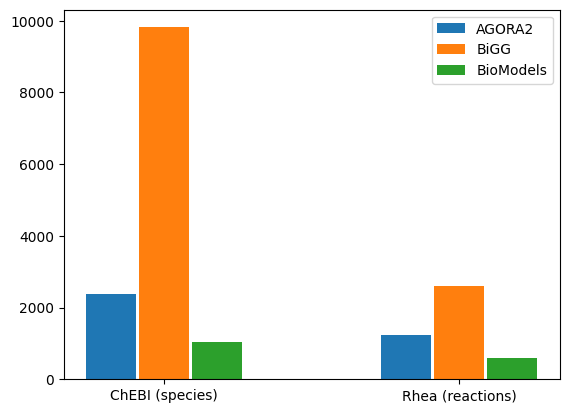

In [203]:
width = 0.17       
ind = ind = np.arange(2)
# Plotting
plt.bar(ind, bars_df['AGORA2'], width, label='AGORA2')
plt.bar(ind + width + 0.01, bars_df['BiGG'], width, label='BiGG')
plt.bar(ind + width*2 + 0.02, bars_df['BioModels'], width, label='BioModels')
plt.xticks(ind + width + 0.01, bars_df['database'])
plt.legend()
# plt.ylim([0,1.23])
# plt.yticks(np.arange(0.0, 1.2, step=0.2))

In [209]:
print(model.getReaction(1000).getAnnotationString())

<annotation xmlns:sbml="http://www.sbml.org/sbml/level3/version1/core">
  <rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:dcterms="http://purl.org/dc/terms/" xmlns:vCard="http://www.w3.org/2001/vcard-rdf/3.0#" xmlns:vCard4="http://www.w3.org/2006/vcard/ns#" xmlns:bqbiol="http://biomodels.net/biology-qualifiers/" xmlns:bqmodel="http://biomodels.net/model-qualifiers/">
    <rdf:Description rdf:about="#R_UAMAS">
      <bqbiol:is>
        <rdf:Bag>
          <rdf:li rdf:resource="http://identifiers.org/ec-code/6.3.2.8"/>
          <rdf:li rdf:resource="http://identifiers.org/metanetx.reaction/MNXR55986"/>
          <rdf:li rdf:resource="http://identifiers.org/seed.reactions/rxn02286"/>
        </rdf:Bag>
      </bqbiol:is>
      <bqbiol:hasProperty>
        <rdf:Bag>
          <rdf:li rdf:resource="http://identifiers.org/sbo/SBO:0000176"/>
        </rdf:Bag>
      </bqbiol:hasProperty>
    </rdf:Description>
  </rdf:RDF>
</annotation>


In [212]:
agora_chebi_set = set(agora_total['chebis'])
bigg_chebi_set = set(bigg_total['chebis'])
biomd_chebi_set = set(biomd_total['chebis'])


agora_rhea_set = set(agora_total['rheas'])
bigg_rhea_set = set(bigg_total['rheas'])
biomd_rhea_set = set(biomd_total['rheas'])

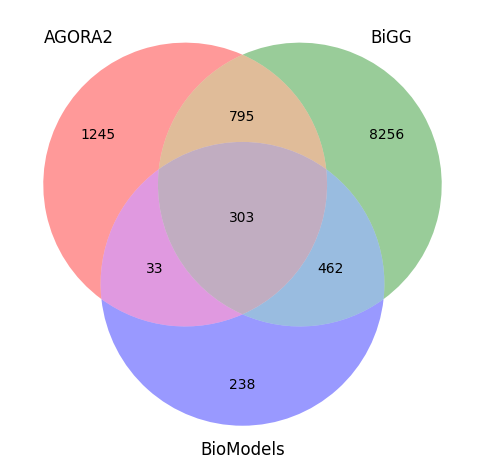

In [221]:
from matplotlib_venn import venn3, venn3_unweighted
fig = plt.figure(figsize=(6, 8))
venn3_unweighted([agora_chebi_set, bigg_chebi_set, biomd_chebi_set],
                 set_labels=['AGORA2', 'BiGG', 'BioModels'])
plt.show()

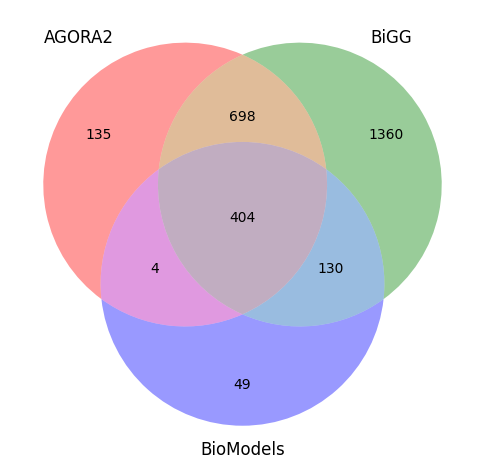

In [222]:
fig = plt.figure(figsize=(6, 8))
venn3_unweighted([agora_rhea_set, bigg_rhea_set, biomd_rhea_set],
                 set_labels=['AGORA2', 'BiGG', 'BioModels'])
plt.show()

In [211]:
agora_total.keys()

dict_keys(['specs', 'reacs', 'chebis', 'rheas'])